In [1]:
import pandas, warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

In [2]:
transurl = "/content/okajakpril.csv"

tanggal = ["tap_in_time", "tap_out_time"]

origin = pandas.read_table(transurl, parse_dates=tanggal, sep=",")

origin.iloc[:5, :5]

,trans_id,pay_card_id,pay_card_bank,pay_card_name,pay_card_sex
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M


In [3]:
origin.iloc[:5, 5:11]

,pay_card_birth_date,corridor_id,corridor,direction,tap_in_stop,tap_in_stop_name
0,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih
1,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2
2,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II
3,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1
4,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat


In [4]:
origin.iloc[:5, 11:16]

,stop_start_seq,tap_in_time,tap_out_stop,tap_out_stop_name,stop_end_seq
0,7,2023-04-03 05:21:44,P00253,Tegalan,12.0
1,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,21.0
2,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,39.0
3,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,29.0
4,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,15.0


In [5]:
origin.iloc[:5, 16:]

,tap_out_time,profit,in_day,selisih,in_hour
0,2023-04-03 06:00:53,3500,Monday,39,5
1,2023-04-03 06:40:01,3500,Monday,57,5
2,2023-04-03 06:50:55,3500,Monday,51,5
3,2023-04-03 06:28:16,3500,Monday,43,5
4,2023-04-03 06:57:03,3500,Monday,39,6


In [6]:
origin.isnull().sum().sum()

0

In [7]:
origin.duplicated().sum()

0

In [8]:
def barplot(result, **barlimit):
  if "ylabel" not in barlimit.keys():
    barlimit["ylabel"] = "Total Trip"
  bar = result.plot.bar(rot=0, **barlimit)
  bar.bar_label(bar.containers[0], fmt="%1.1f");

colors = ["#BC9F8B", "#B5CFB7", "#C5705D", "#ACE1AF", "#B3C8CF"]

### `April 2023`

In [9]:
origin["profit"].sum()

86359000

In [10]:
origin["profit"].count()

32595

On April 2023, There Are 32.595 Total Trip, From Jaklingko and Trans Jakarta, Where Total Profit in April 2023 is Rp. 86.359.000

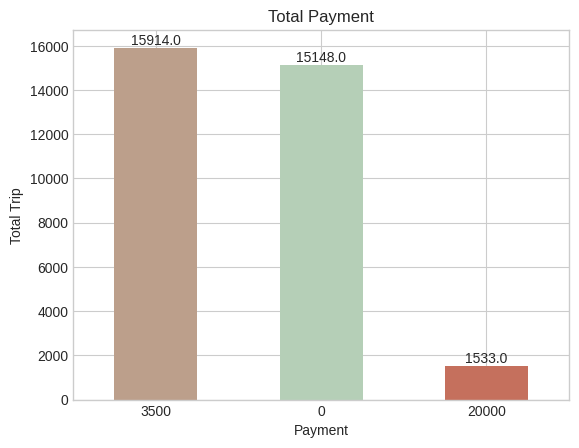

In [11]:
result = origin.profit.value_counts()

barplot(result, xlabel="Payment", title="Total Payment", color=colors)

In [12]:
import numpy as np

origin["jaklingko"] = np.where(origin["corridor_id"].str.startswith("JAK"), 1, 0)

origin.iloc[:5, 16:]

,tap_out_time,profit,in_day,selisih,in_hour,jaklingko
0,2023-04-03 06:00:53,3500,Monday,39,5,0
1,2023-04-03 06:40:01,3500,Monday,57,5,0
2,2023-04-03 06:50:55,3500,Monday,51,5,0
3,2023-04-03 06:28:16,3500,Monday,43,5,0
4,2023-04-03 06:57:03,3500,Monday,39,6,0


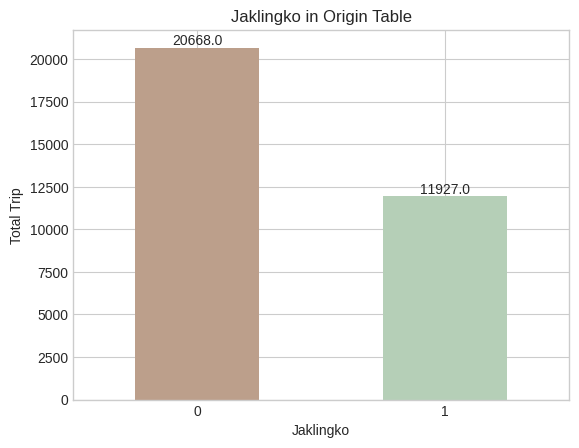

In [13]:
jato = origin["jaklingko"].value_counts()

title = "Jaklingko in Origin Table"

barplot(jato, xlabel="Jaklingko", title=title, color=colors)

There Are *20.668 Transjakarta Trip, 11.927 Jaklingko Trip, 1.533 Royal Trans Trip*


Combining Two Barplot Above, The Rp. 0 Come From *11.927 Jaklingko Trip*, Meanwhile, *3.221 From KLG Service*.

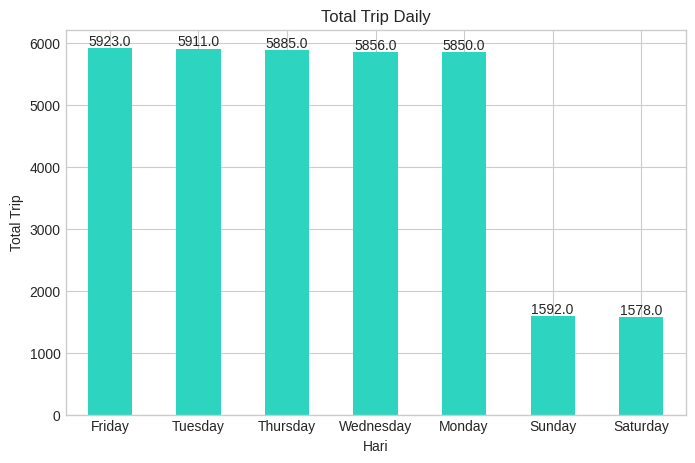

In [14]:
jato = origin["in_day"].value_counts()

title = "Total Trip Daily"

barplot(jato, xlabel="Hari", title=title, color="#2DD4BF", figsize=(8, 5))

Total Trip in Monday to Friday is More Than 5.800 Trip, in Saturday to Sunday is More Than 1.500 Trip

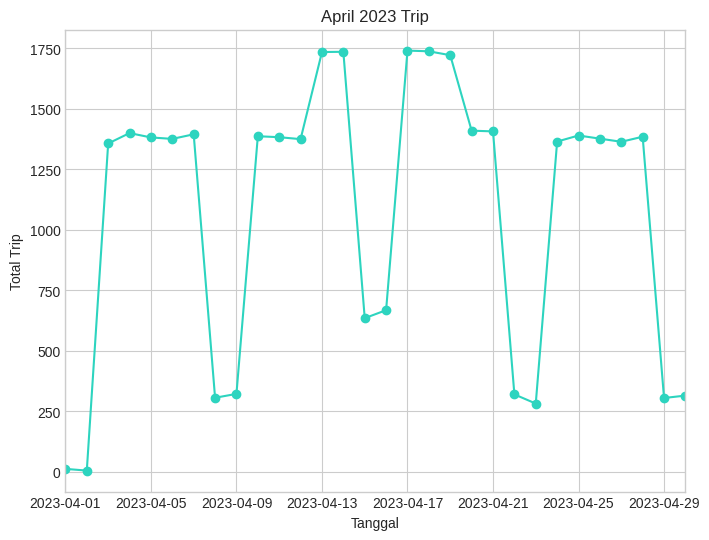

In [15]:
tanggal = origin.groupby(origin.tap_in_time.dt.date)["profit"].count()

title = "April 2023 Trip"

ylabel = "Total Trip"

plot = tanggal.plot.line(title=title, marker="o", color="#2DD4BF", figsize=(8, 6))

plot.set_xlim(tanggal.index.min(), tanggal.index.max())

plot.set_ylabel(ylabel)

plot.set_xlabel("Tanggal");

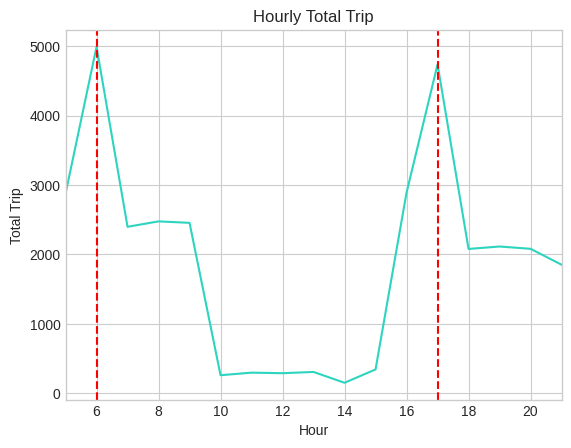

In [16]:
jamly = origin.sort_values("in_hour").groupby("in_hour")["profit"].count()

title = "Hourly Total Trip"

ylabel = "Total Trip"

plot = jamly.plot.line(title=title, xlabel="Hour", ylabel=ylabel, color="#2DD4BF")

plot.set_xlim(origin["in_hour"].min(), origin["in_hour"].max())

for t in jamly.sort_values(ascending=False).iloc[:2].index.tolist():
  # Vertical Line
  plot.axvline(t, color="r", linestyle="--");

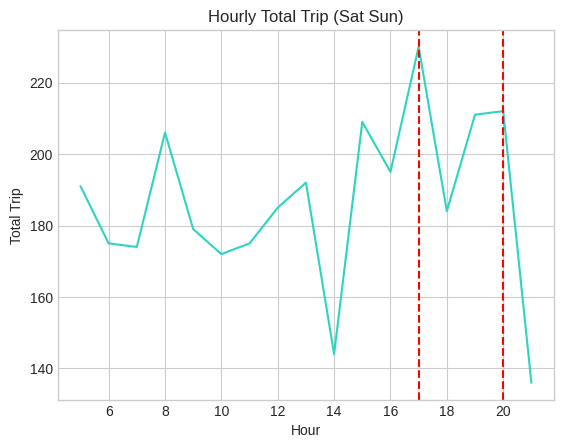

In [17]:
daily = origin[origin.in_day.isin(["Sunday", "Saturday"])]

jamly = daily.sort_values("in_hour").groupby("in_hour")["profit"].count()

title = "Hourly Total Trip (Sat Sun)"

ylabel = "Total Trip"

plot = jamly.plot.line(title=title, xlabel="Hour", ylabel=ylabel, color="#2DD4BF")

for t in jamly.sort_values(ascending=False).iloc[:2].index.tolist():
  # Vertical Line
  plot.axvline(t, color="r", linestyle="--");

Rush Hour in Monday to Friday is 6.00 A.M and 17.00 P.M, Meanwhile in Saturday to Sunday is 17.00 P.M and 20.00 P.M

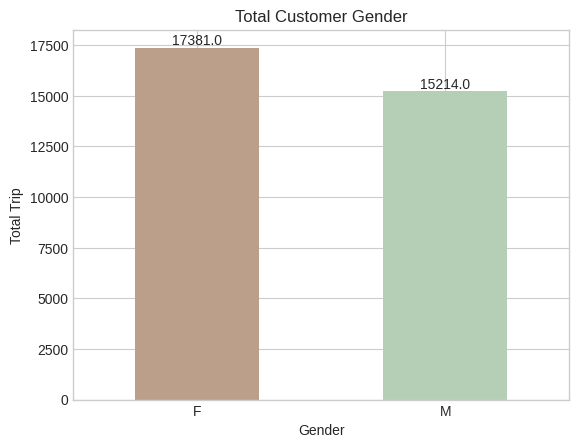

In [18]:
result = origin.pay_card_sex.value_counts()

title = "Total Customer Gender"

barplot(result, xlabel="Gender", title=title, color=colors)

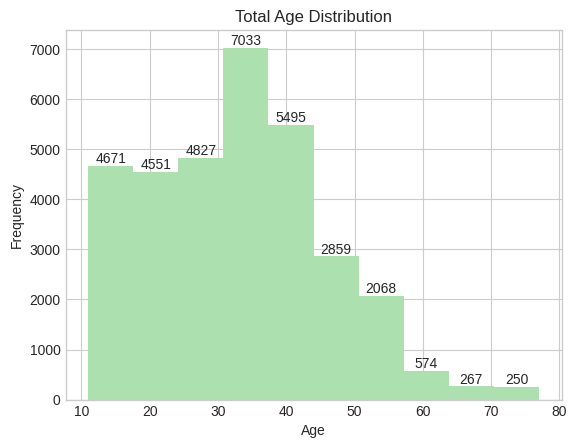

In [19]:
origin["age"] = 2023 - origin.pay_card_birth_date

title = "Total Age Distribution"

plot = origin["age"].plot.hist(title=title, bins=10, xlabel="Age", color=colors[3])

plot.bar_label(plot.containers[0]);

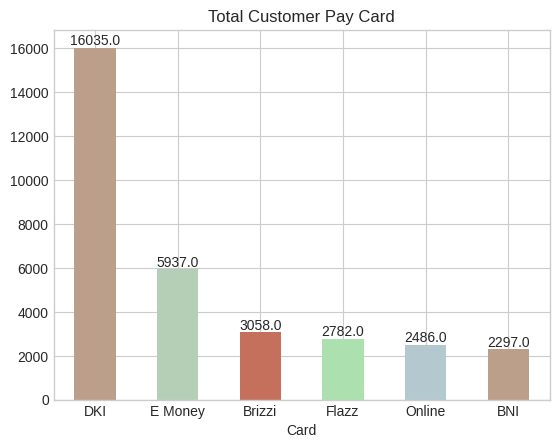

In [20]:
result = origin.pay_card_bank.value_counts()

title = "Total Customer Pay Card"

provider = ["DKI", "E Money", "Brizzi", "Flazz", "Online", "BNI"]

plot = result.plot.bar(rot=0, title=title, color=colors, xlabel="Card")

plot.set_xticklabels(provider, rotation=0)

plot.bar_label(plot.containers[0], fmt="%1.1f");

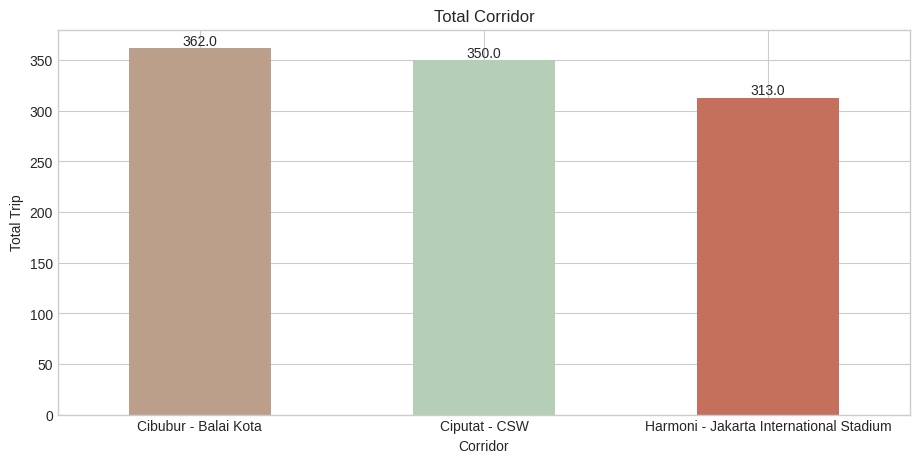

In [21]:
corr = origin.corridor.value_counts().iloc[:3]

barplot(corr, xlabel="Corridor", title="Total Corridor", color=colors, figsize=(11, 5))

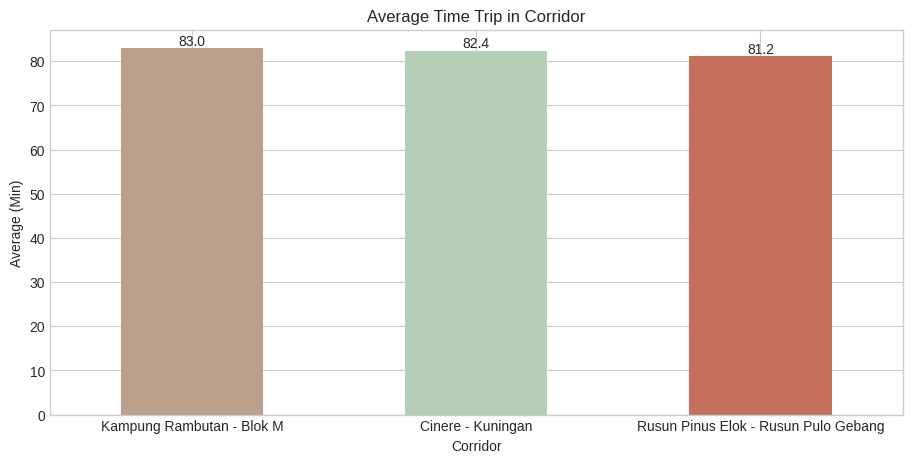

In [22]:
corr = origin.groupby("corridor")["selisih"].mean()

corr = corr.sort_values(ascending=False).iloc[:3]

title = "Average Time Trip in Corridor"

ylabel = "Average (Min)"

barplot(corr, xlabel="Corridor", title=title, color=colors, figsize=(11, 5), ylabel=ylabel)

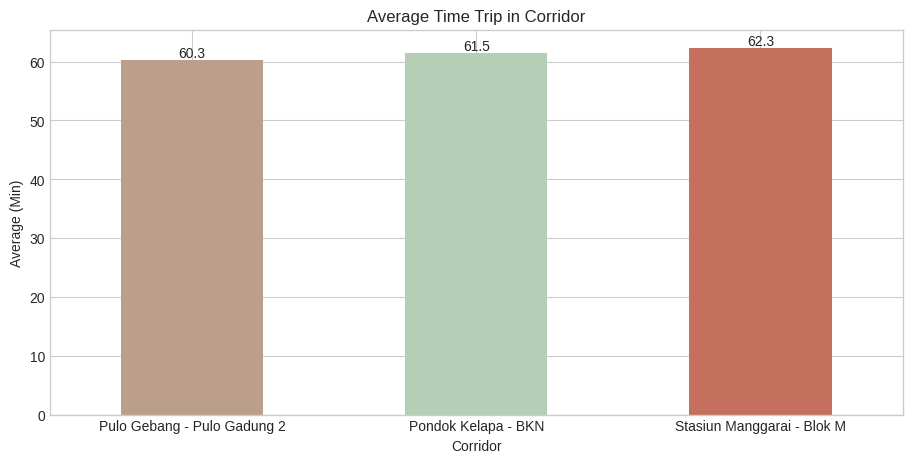

In [23]:
corr = origin.groupby("corridor")["selisih"].mean()

corr = corr.sort_values().iloc[:3]

title = "Average Time Trip in Corridor"

ylabel = "Average (Min)"

barplot(corr, xlabel="Corridor", title=title, color=colors, figsize=(11, 5), ylabel=ylabel)

In [24]:
stopa = origin.groupby(["tap_in_stop_name", "tap_out_stop_name"])[["profit"]].count()

stopa.sort_values("profit", ascending=False).iloc[:5]

,,profit
tap_in_stop_name,tap_out_stop_name,
Rusun Kapuk Muara,Penjaringan,108
Penjaringan,Rusun Kapuk Muara,103
Garuda Taman Mini,BKN,92
Tanah Merdeka Arah Timur,Kampung Rambutan,79
Cibubur Junction,BKN,75
